In [1]:
import os
os.environ["DEBUG"] = "6"
os.environ["LLVM"] = "1"
os.environ["NOOPT"] = "1"
import numpy as np
from tinygrad import Tensor, dtypes
from tinygrad.helpers import fetch
from PIL import Image
from scipy import signal


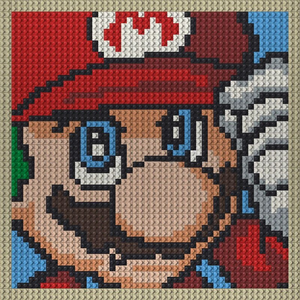

In [2]:
size = 300
img = Image.open(fetch("https://ae01.alicdn.com/kf/U4ac877fec5db4eafb2bccabff28a4158M/New-MOC-Pixel-Art-Marioeds-Mosaic-Painting-Building-Blocks-Kids-Toys-Home-Decoration-Paintings-Puzzle-DIY.jpg")).resize((size, size), Image.Resampling.LANCZOS)
display(img)

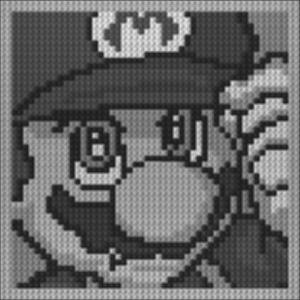

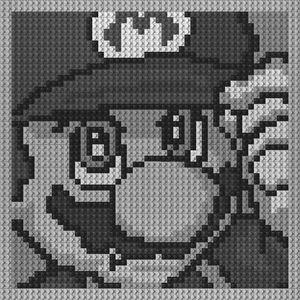

In [3]:
t = np.array(img.convert('L')).astype(np.float32) / 255
wt = np.full((3, 3), 1/9)
t = signal.convolve(t, wt, mode='same')
t = t.reshape(size, size) * 255
ti = Image.fromarray(t.astype(np.uint8), 'L')

display(ti, img.convert('L'))

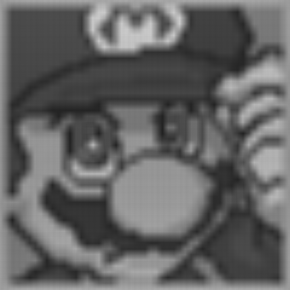

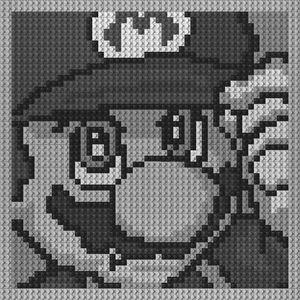

In [4]:
# blur
x = Tensor(np.array(img.convert('L')).reshape(1, 1, size, size), dtype=dtypes.float32) / 255
w = Tensor.full((1, 1, 11, 11), 1/(11*11), dtype=dtypes.float32)
x = x.conv2d(w) * 255
y = x.reshape(x.shape[-1], x.shape[-1]).cast(dtypes.uint8)
im = Image.fromarray(y.numpy(), mode="L")
display(im, img.convert('L'))

pixel 00  175.0 168.0 139.0
pixel 01  162.0 155.0 126.0
pixel 00  153.91158 153.91158 153.91158
pixel 01  154.70749 154.70749 154.70749
[153 153 153]


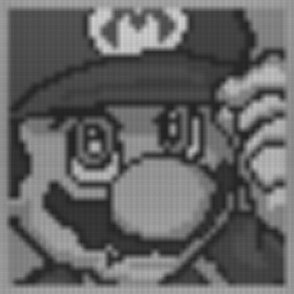

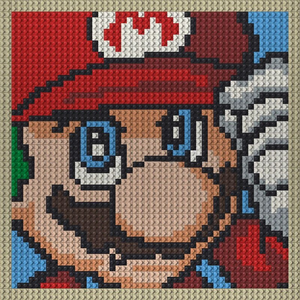

In [5]:
x = Tensor(np.array(img.convert('RGB')), dtype=dtypes.float32)
# x = x.reshape(3, size, size) # wrong
x = x.permute(2, 0, 1).reshape(1, 3, size, size)
print("pixel 00 ", x.numpy()[0][0][0][0], x.numpy()[0][1][0][0], x.numpy()[0][2][0][0])
print("pixel 01 ", x.numpy()[0][0][0][1], x.numpy()[0][1][0][1], x.numpy()[0][2][0][1])
w = Tensor.full((3, 3, 7, 7), 1/147, dtype=dtypes.float32)
x = x.conv2d(w)
print("pixel 00 ", x.numpy()[0][0][0][0], x.numpy()[0][1][0][0], x.numpy()[0][2][0][0])
print("pixel 01 ", x.numpy()[0][0][0][1], x.numpy()[0][1][0][1], x.numpy()[0][2][0][1])
y = x.reshape(3, x.shape[-2], x.shape[-1]).permute(1, 2, 0).cast(dtypes.uint8)
print(y.numpy()[0][0][:])
im = Image.fromarray(y.numpy(), mode="RGB")
display(im, img.convert('RGB'))

# cnn convolutions apply the filter for each channel and sum the result to return a single value
# that's why the image is greyscale

pixel 00  175.0 168.0 139.0
pixel 01  162.0 155.0 126.0
pixel 00  191.12495 238.90625 318.54166
pixel 01  186.46996 233.0875 310.78333
[191 238  62]


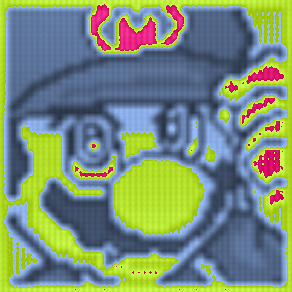

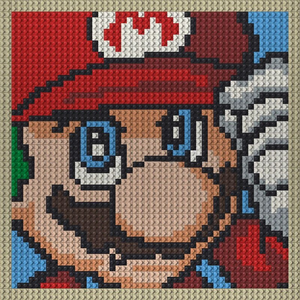

In [6]:
x = Tensor(np.array(img.convert('RGB')), dtype=dtypes.float32)
# x = x.reshape(3, size, size) # wrong
x = x.permute(2, 0, 1).reshape(1, 3, size, size)
print("pixel 00 ", x.numpy()[0][0][0][0], x.numpy()[0][1][0][0], x.numpy()[0][2][0][0])
print("pixel 01 ", x.numpy()[0][0][0][1], x.numpy()[0][1][0][1], x.numpy()[0][2][0][1])
filterR = Tensor.full((1, 3, 9, 9), 1/200, dtype=dtypes.float32)
filterG = Tensor.full((1, 3, 9, 9), 1/160, dtype=dtypes.float32)
filterB = Tensor.full((1, 3, 9, 9), 1/120, dtype=dtypes.float32)
w = Tensor.cat(filterR, filterG, filterB)
x = x.conv2d(w)
print("pixel 00 ", x.numpy()[0][0][0][0], x.numpy()[0][1][0][0], x.numpy()[0][2][0][0])
print("pixel 01 ", x.numpy()[0][0][0][1], x.numpy()[0][1][0][1], x.numpy()[0][2][0][1])
y = x.reshape(3, x.shape[-2], x.shape[-1]).permute(1, 2, 0).cast(dtypes.uint8)
print(y.numpy()[0][0][:])
im = Image.fromarray(y.numpy(), mode="RGB")
display(im, img.convert('RGB'))


In [3]:
x = Tensor(np.array(img.convert('L')), dtype=dtypes.float32)
x = x.reshape(1, 1, size, size)
w = Tensor.full((1, 1, 7, 7), 1/49, dtype=dtypes.float32)
x = x.conv2d(w)
x.numpy()

*** LLVM       1 copy   360000,    LLVM <- EXT          arg   2 mem  0.00 GB tm     67.88us/     0.07ms (    0.00 GFLOPS,    5.30 GB/s)
  0 ━┳ STORE MemBuffer(idx=0, dtype=dtypes.float, st=ShapeTracker(views=(View(shape=(1, 1, 1, 294, 294, 1, 1, 1), strides=(0, 0, 0, 294, 1, 0, 0, 0), offset=0, mask=None, contiguous=True),)))
  1  ┗━┳ SUM (7, 6)
  2    ┗━┳ MUL 
  3      ┣━━ LOAD MemBuffer(idx=1, dtype=dtypes.float, st=ShapeTracker(views=(View(shape=(1, 1, 1, 294, 294, 1, 7, 7), strides=(0, 0, 0, 300, 1, 0, 300, 1), offset=0, mask=None, contiguous=False),)))
  4      ┗━━ CONST ConstBuffer(val=0.02040816326530612, dtype=dtypes.float, st=ShapeTracker(views=(View(shape=(1, 1, 1, 294, 294, 1, 7, 7), strides=(0, 0, 0, 0, 0, 0, 0, 0), offset=0, mask=None, contiguous=False),)))
reduced UOp count from 25 to 24
   0 UOps.DEFINE_GLOBAL  : ptr.dtypes.float          []                               (0, 'data0', True)
   1 UOps.DEFINE_GLOBAL  : ptr.dtypes.float          []                           

array([[[[160.08165, 160.91837, 158.77551, ..., 153.65303, 152.18365,
          152.99998],
         [161.85716, 163.4694 , 161.44897, ..., 155.59181, 153.30609,
          154.93878],
         [160.40817, 162.24492, 160.91838, ..., 155.30608, 151.30609,
          153.3061 ],
         ...,
         [160.22449, 162.34692, 160.69386, ..., 155.16325, 150.91837,
          153.73466],
         [159.53058, 161.89793, 159.38774, ..., 153.5102 , 151.24489,
          154.18365],
         [161.57144, 162.83676, 159.57146, ..., 154.38776, 154.16327,
          156.22447]]]], dtype=float32)